In [1]:
import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
!mkdir -p mask_dataset/Mask
!mkdir -p mask_dataset/No_Mask

with zipfile.ZipFile("Mask.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/mask_dataset/Mask")

with zipfile.ZipFile("No Mask.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/mask_dataset/No_Mask")


In [3]:
data = []
labels = []
IMG_SIZE = 100

def load_images_from_folder(folder, label):
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = cv2.imread(path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(label)

load_images_from_folder("/content/mask_dataset/Mask/Mask", 1)       # 1 = Mask
load_images_from_folder("/content/mask_dataset/No_Mask/No Mask", 0)    # 0 = No Mask

data = np.array(data) / 255.0
labels = to_categorical(labels, 2)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,346 (16.61 MB)

 Trainable params: 4,353,346 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 553ms/step - accuracy: 0.5550 - loss: 0.8420 - val_accuracy: 0.6765 - val_loss: 0.6419
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 471ms/step - accuracy: 0.7363 - loss: 0.5772 - val_accuracy: 0.8382 - val_loss: 0.4997
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 439ms/step - accuracy: 0.8402 - loss: 0.4006 - val_accuracy: 0.8235 - val_loss: 0.4267
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 622ms/step - accuracy: 0.8846 - loss: 0.2730 - val_accuracy: 0.8529 - val_loss: 0.3374
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 432ms/step - accuracy: 0.9448 - loss: 0.1779 - val_accuracy: 0.7794 - val_loss: 0.4134
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 593ms/step - accuracy: 0.9176 - loss: 0.1830 - val_accuracy: 0.8676 - val_loss: 0.2874
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 436ms/step - accuracy: 0.9599 - loss: 0.1073 - val_accuracy: 0.8382 - val_loss: 0.3258
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 462ms/step - accuracy: 0.9718 - loss: 0.0949 - val_accuracy: 0.8676 - val_loss:

In [6]:
model.save("mask_detector_model.h5")


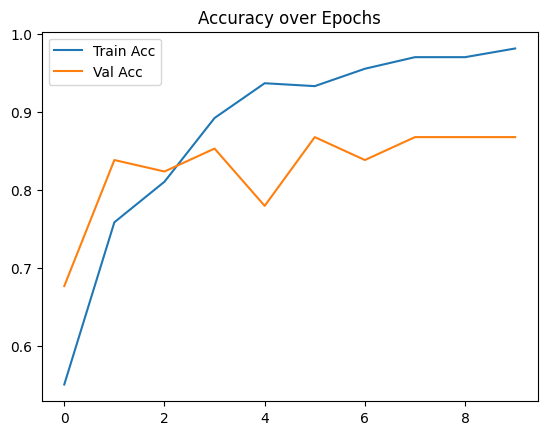

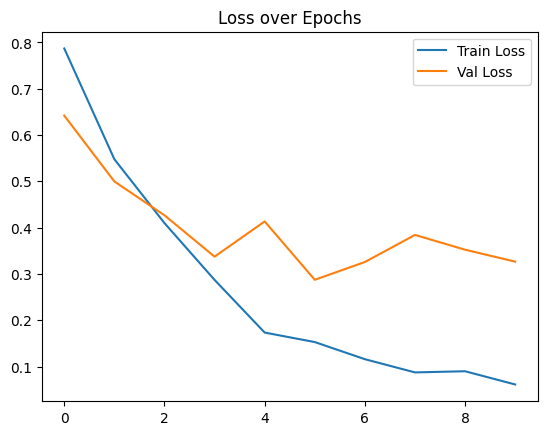

In [7]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


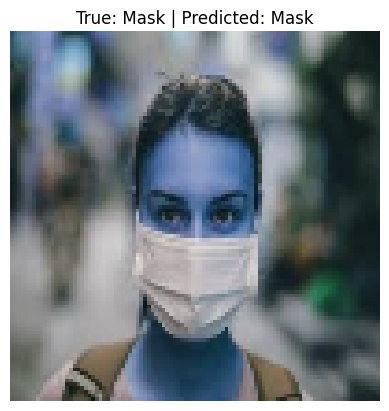

In [8]:
import random
index = random.randint(0, len(X_test)-1)
test_image = X_test[index]
true_label = np.argmax(y_test[index])

prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

plt.imshow(test_image)
plt.title(f"True: {'Mask' if true_label==1 else 'No Mask'} | Predicted: {'Mask' if predicted_label==1 else 'No Mask'}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


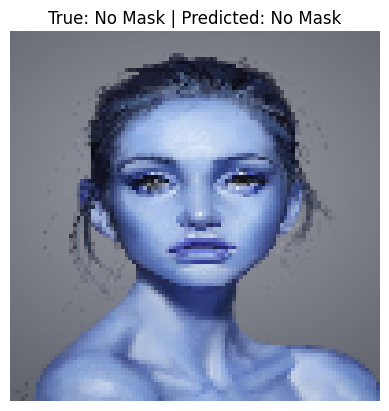

In [9]:
import random


index = random.randint(0, len(X_test)-1)


test_image = X_test[index]
true_label = np.argmax(y_test[index])


prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)


plt.imshow(test_image)
plt.title(f"True: {'Mask' if true_label==1 else 'No Mask'} | Predicted: {'Mask' if predicted_label==1 else 'No Mask'}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


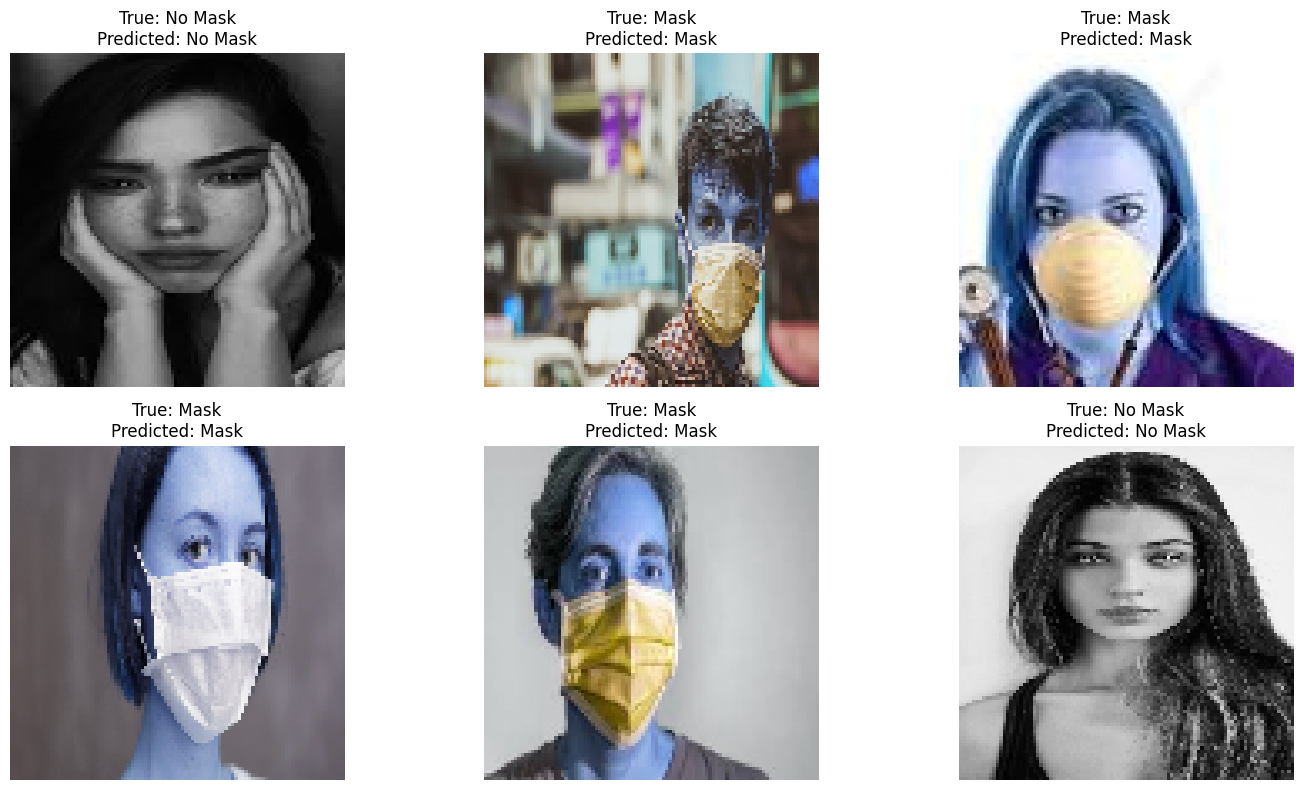

In [10]:
num_samples = 6
plt.figure(figsize=(15, 8))

for i in range(num_samples):
    index = random.randint(0, len(X_test)-1)
    img = X_test[index]
    true_label = np.argmax(y_test[index])
    prediction = model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(prediction)

    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f"True: {'Mask' if true_label==1 else 'No Mask'}\nPredicted: {'Mask' if predicted_label==1 else 'No Mask'}")
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


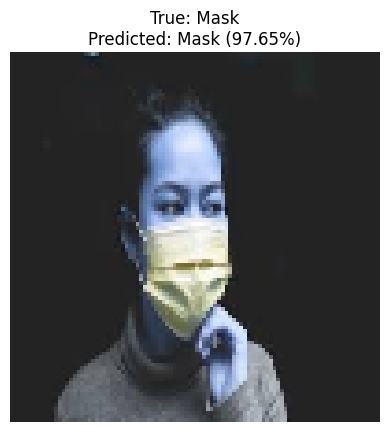

In [11]:
index = random.randint(0, len(X_test)-1)
img = X_test[index]
true_label = np.argmax(y_test[index])
prediction = model.predict(np.expand_dims(img, axis=0))[0]
predicted_label = np.argmax(prediction)

plt.imshow(img)
plt.title(f"True: {'Mask' if true_label==1 else 'No Mask'}\nPredicted: {'Mask' if predicted_label==1 else 'No Mask'} ({prediction[predicted_label]*100:.2f}%)")
plt.axis('off')
plt.show()
